In [1]:
import sys
import os
import logging

import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from BDT import (
    read_data,
    read_features,
    prepare_test_data,
    prepare_test_data_matrix,
    prepare_data_matrix,
)
shap.initjs()

In [2]:
# load data and model
SPLIT_FRACTION = 0.5
data = read_data("./input/")
feature_names = read_features(data)
data_test = prepare_test_data(data, SPLIT_FRACTION)
test_data_matrix = prepare_test_data_matrix(data_test, feature_names)

X_test = data_test[feature_names]

booster = xgb.Booster()
booster.load_model("./output/booster.bin")
booster.feature_names = feature_names # save_model does not save feature names

In [3]:
# get predictions
BEST_CUT = 0.18
predictions = booster.predict(test_data_matrix)

true_positives = []
true_negatives = []
false_positives = []
false_negatives = []

for i, prediction in enumerate(predictions):
    if bool(test_data_matrix.get_label()[i]):
        if prediction > BEST_CUT:
            true_positives.append(i)
        else:
            false_negatives.append(i)
    else:
        if prediction < BEST_CUT:
            true_negatives.append(i)
        else:
            false_positives.append(i)
#print(true_positives)
#print(true_negatives)
print(false_positives)
print(false_negatives)
# ind = 0
# print(data_test.iloc[ind])
# print(predictions[ind])

[56, 160, 204, 282, 288, 289, 379, 435, 488, 548, 599, 618, 682, 854, 864, 882, 896, 994, 1027, 1043, 1049, 1142, 1237, 1269, 1304, 1327, 1339, 1340, 1349, 1399, 1401, 1491, 1599, 1649, 1750, 1824, 1939, 2179, 2368, 2390, 2433, 2462, 2500, 2516, 2518, 2543, 2618, 2632, 2726, 2727, 2741, 2769, 2837, 2843, 2893, 2927, 3047, 3058, 3059, 3126, 3128, 3172, 3187, 3209, 3304, 3343, 3368, 3399, 3510, 3527, 3541, 3562, 3648, 3745, 3809, 3841, 3884, 3929, 4042, 4165, 4182]
[0, 52, 350, 374, 519, 781, 826, 842, 892, 1023, 1459, 1529, 1541, 1594, 1628, 1630, 1669, 1784, 1788, 1895, 2029, 2151, 2367, 2391, 2414, 2497, 2578, 2703, 2887, 3052, 3208, 3323, 3438, 3572, 3614, 3638, 3641, 3769, 4010, 4088, 4121, 4130, 4139, 4211]


In [4]:
# calculate shap values
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_test)

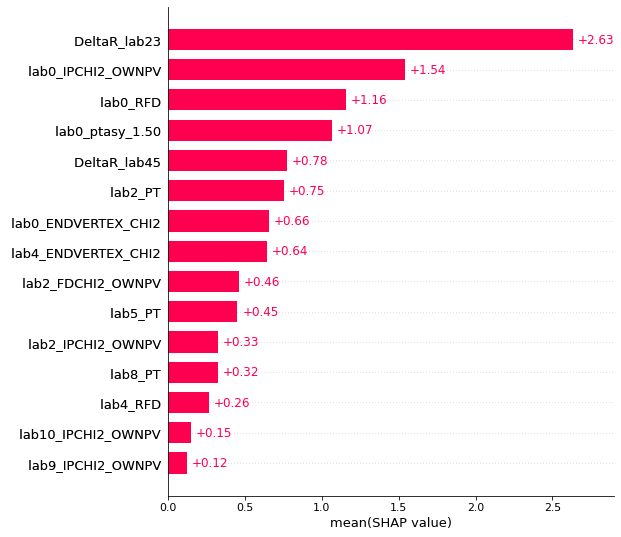

In [5]:
shap.plots.bar(explainer(X_test.iloc[false_positives]), max_display=20)

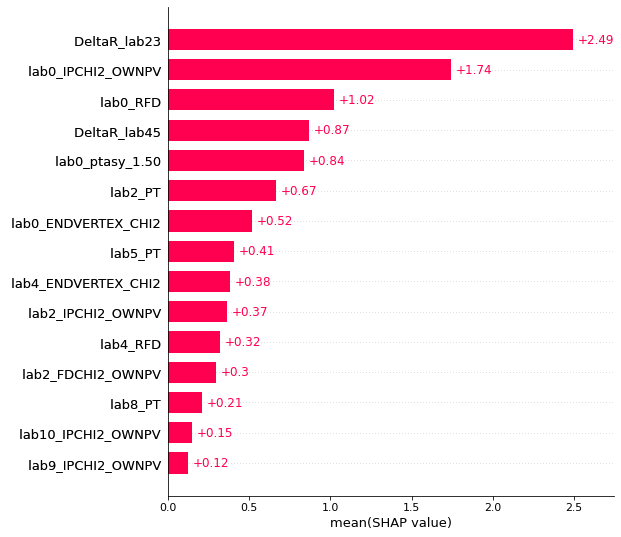

In [6]:
shap.plots.bar(explainer(X_test.iloc[false_negatives]), max_display=20)

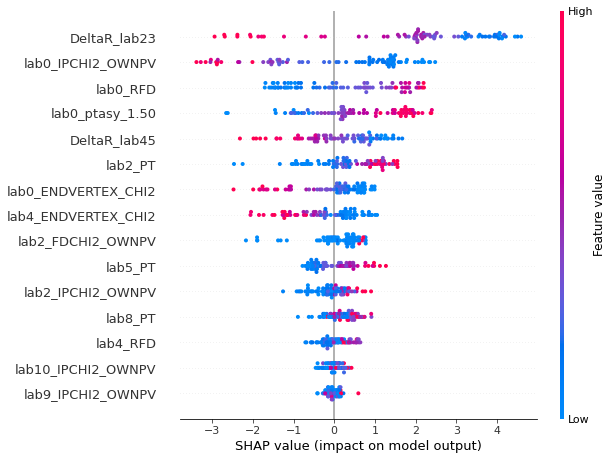

In [7]:
# summarize the effects of false positives
shap.summary_plot(shap_values[false_positives], X_test.iloc[false_positives])

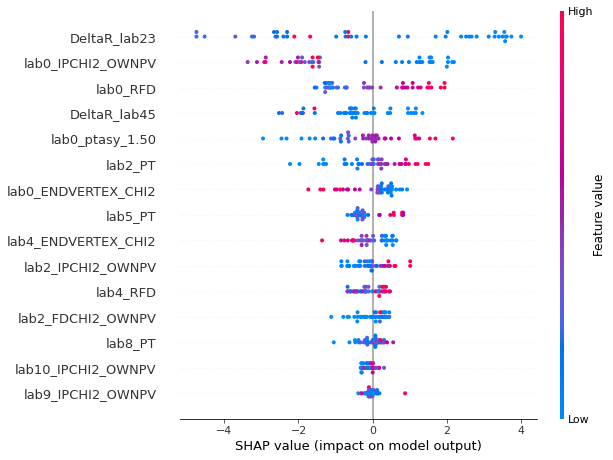

In [8]:
# summarize the effects of false negatives
shap.summary_plot(shap_values[false_negatives], X_test.iloc[false_negatives])

In [9]:
shap.force_plot(explainer.expected_value, shap_values[false_negatives], X_test.iloc[false_negatives])

In [10]:
shap.force_plot(explainer.expected_value, shap_values[false_positives], X_test.iloc[false_positives])

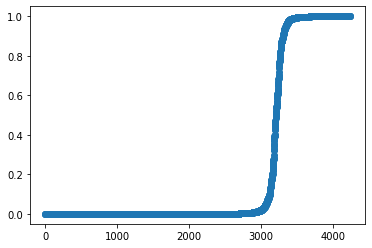

In [21]:
# 
#for feature_name in feature_names:
#    shap.dependence_plot(feature_name, shap_values[false_positives], X_test.iloc[false_positives], interaction_index=None)
# plt.scatter(X_test.iloc[false_positives]["DeltaR_lab23"], shap_values[false_positives][:,0])
plt.scatter(range(len(predictions)), sorted(predictions))